# Introduction to Electromagnetism

In [1]:
# Import libraries first
%matplotlib inline
import numpy as np
import scipy.interpolate as interpol
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import sys, logging, os, re
import time

# import seaborn as sns
import scipy
import scipy.io as sio
from math import pi

***
## Contents
- [Introduction](#Introduction)
- [Coulomb's law](#Coulomb's law)
    - [Exercise 1](#Exercise 1)
- [The Electic field](#Electric field)
- [Electric field "Picture"](#Electric field "Picture")
    - [Exercise 2](#Exercise 2)

***
### Coulomb's law

The force exerted by one point charge ($q_1$) on another ($q_2$) is alogn the line joining ($\hat r$)the charges. It is repulsive if the charges have the same sign and attractive if the charges have opposite signs. The force varies inversely as the square of the distance seperating the cherges and is proportional to the produict of the charges:

$$\vec F = k_e \cdot \frac{q_1 \cdot q_2}{r^2}\cdot \hat r,$$

where: 
- $k_e \approx 8.988\cdot 10^9 $ Nm$^2$/C$^2$, is Coulomb's constant, 
- $q_1$ and $q_2$ are the magnitudes of the point charges
- $r$ is the distance between the charges.

SI Units:
- $[q]=[Coulomb]=[C]$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/CoulombsLaw.svg/500px-CoulombsLaw.svg.png">

#### Fundamental unit of charge -Electron

Any charge can be written as: $$q = N \cdot e$$

where $N$ is an integer and $e=1.6 \cdot 10^{-19} C$ is the magnitude of the fundamental charge unit (electron)

#### Exercise 1

Two point charges of $0.05 \mu C$ are separated by 10cm. Find the force exerted by one charge on the other and the number of fundamental units of charge in each.

In [2]:
ke=8.988*10**9
e=1.6*10**(-19)

### BEGIN SOLUTION
q1=0.05*10**(-6)
q2=q1
r=0.1
F = ke*q1*q2/r**2
### END SOLUTION

In [3]:
F

0.0022469999999999994

In [4]:
### BEGIN SOLUTION
N=q1/e
### END SOLUTION

In [5]:
print('{:.2e}'.format(N))

3.12e+11


***
### Electric field - $\vec E$ 

If we place a small "test" charge $q_0$ at some point near a system of charges $q_1-q_2-q_3$ there will be a force exerted on this charge due to the other charges.

Define $\vec E$ as the resultant force on the test charge, divided by the charge:

$$\vec E = \frac{\vec F}{q_0}$$

For a point charge we get

$$\vec E= k_e \cdot \frac{q_1}{r^2} \cdot \hat r$$

***
### Electric field "Picture"

#### Rules:
-The number of lines leaving a (+) charge or entering a (-) charge is proportional to the charge
- The lines are drawn symmetrically leaving/entering a point charge
- The lines begin on (+) charges and end on (-) charges
- The density of lines is proportional to the magnitude of the field
- No two field lines can cross

In [40]:
plt.style.use('bmh')

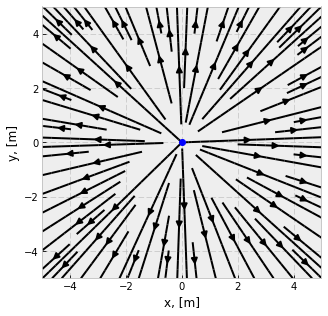

In [41]:
plt.figure(figsize=(5, 5))

# Define one positive charge
# charges (x [m], y [m], q [C])
C = [(0,0,1)]

[xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]
k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

# Plot the point charges
for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'bo'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color)
plt.axis([xmin, xmax, ymin, ymax])

# Calculate the field lines
n = 1000j  # Mesh grid resolution
Y, X = np.mgrid[xmin:xmax:n, ymin:ymax:n]  # Meshgrid
Ex, Ey = np.array(X*0), np.array(Y*0)
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
    Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R
    
# Plot the result
plt.streamplot(X, Y, Ex, Ey, color='k', density=1., 
               arrowstyle='simple')
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')

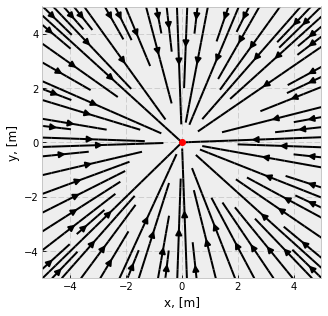

In [42]:
plt.figure(figsize=(5, 5))

# Define one negative charge
# charges (x [m], y [m], q [C])
C = [(0,0,-1)]

[xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]
k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

# Plot the point charges
for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'bo'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color)
plt.axis([xmin, xmax, ymin, ymax])

# Calculate the field lines
n = 1000j  # Mesh grid resolution
Y, X = np.mgrid[xmin:xmax:n, ymin:ymax:n]  # Meshgrid
Ex, Ey = np.array(X*0), np.array(Y*0)
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
    Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R
    
# Plot the result
plt.streamplot(X, Y, Ex, Ey, color='k', density=1., 
               arrowstyle='simple')
plt.xlabel('x, [m]')
plt.ylabel('y, [m]')

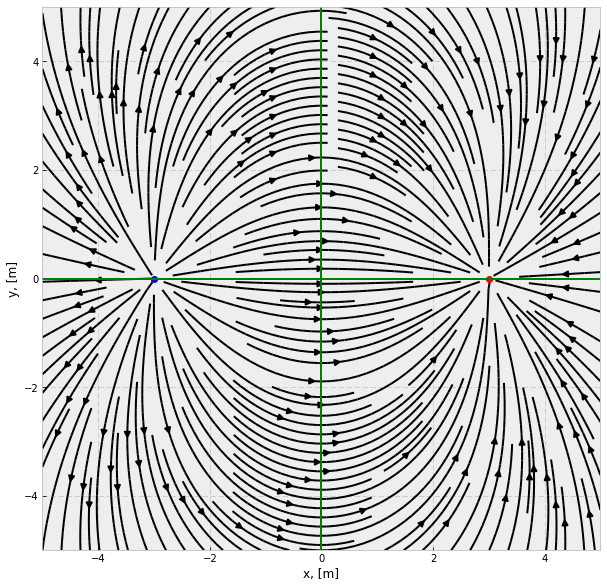

In [43]:
plt.figure(figsize=(10, 10))

# Define one positive and one negative
# charges (x [m], y [m], q [C])
C = [(3,0,-1), (-3,0,1)]

[xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]
k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

# Plot the point charges
for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'bo'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color)
plt.axis([xmin, xmax, ymin, ymax])

# Calculate the field lines
n = 200j  # Mesh grid resolution
Y, X = np.mgrid[xmin:xmax:n, ymin:ymax:n]  # Meshgrid
Ex, Ey = np.array(X*0), np.array(Y*0)
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
    Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R
    
plt.axhline(y=0, color='g')
plt.axvline(x=0, color='g')

# Plot the result
plt.streamplot(X, Y, Ex, Ey, color='k', density=2., 
               arrowstyle='simple')

plt.xlabel('x, [m]')
plt.ylabel('y, [m]')

#### Exercise 2

Use the ploting code provided above to map the electric field created by a set of charges defined by you (min number of charges is four-4).

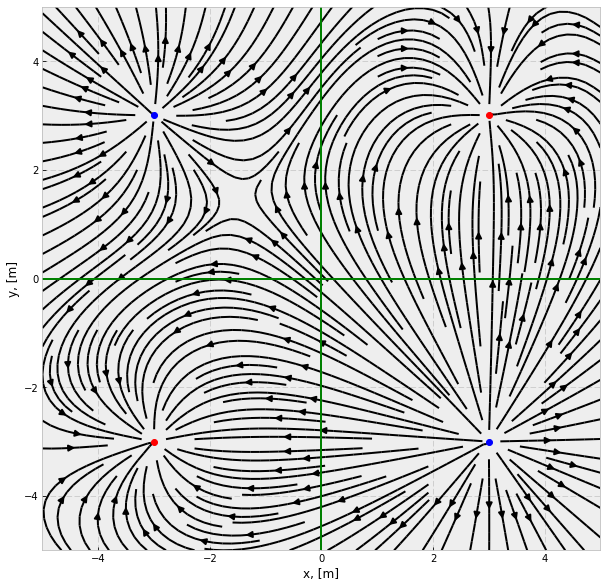

In [44]:
plt.figure(figsize=(10, 10))

# Define two positive and three negative
# charges (x [m], y [m], q [C])
# C = [(-3,0,1), (3,0,-1), (0,3,-1), (0,-3,-1), (0,-1,-5), (1,-1,-10)] 
C = [(-3,-3,-1), (3,3,-1), (-3,3,1), (3,-3,10)]

[xmin, xmax, ymin, ymax] = [-5, 5, -5, 5]
k = 8.99*10**9  # [Nm^2/C^2], in Coulomb's law

# Plot the point charges
for i in range(0, len(C)):
    if C[i][2] > 0:
        color = 'bo'
    elif C[i][2] < 0:
        color = 'ro'
    else:
        color = 'wo'
    plt.plot(C[i][0], C[i][1], color)
plt.axis([xmin, xmax, ymin, ymax])

# Calculate the field lines
n = 200j  # Mesh grid resolution
Y, X = np.mgrid[xmin:xmax:n, ymin:ymax:n]  # Meshgrid
Ex, Ey = np.array(X*0), np.array(Y*0)
for i in range(0, len(C)):
    R = np.sqrt((X-C[i][0])**2 + (Y-C[i][1])**2)
    Ex = Ex + k*C[i][2]/R**2*(X-C[i][0])/R
    Ey = Ey + k*C[i][2]/R**2*(Y-C[i][1])/R
    
plt.axhline(y=0, color='g')
plt.axvline(x=0, color='g')

# Plot the result
plt.streamplot(X, Y, Ex, Ey, color='k', density=2., 
               arrowstyle='simple')

plt.xlabel('x, [m]')
plt.ylabel('y, [m]')
plt.show()